# Import Statements

In [ ]:
import numpy as np
import pandas as pd
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


# One Hot Encoding the Target Classes


*   0 - Tumour
*   1 - No Tumour



In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

# Encoded list for images with tumour

In [ ]:
imageData = [] # Stores images as numpy arrays
paths = [] # stores path of all the images
encodedResult = [] # stores encoded format of target class (0 or 1) for all the images

for r, _, f in os.walk(r'/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Training/Type_4'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        imageData.append(np.array(img))
        encodedResult.append(encoder.transform([[0]]).toarray())

# Encoded list for images without tumour

In [ ]:
paths = []
for r, _, f in os.walk(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        imageData.append(np.array(img))
        encodedResult.append(encoder.transform([[1]]).toarray())

# Converting imageData to numpy array

In [ ]:
imageData = np.array(imageData)
imageData.shape

(2544, 128, 128, 3)

# Converting encodedResult to numpy array and reshaping it

In [ ]:
encodedResult = np.array(encodedResult)
encodedResult = encodedResult.reshape(2544,2)

# Splitting the Data into 90% Training & 10% Testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(imageData, encodedResult, test_size=0.1, shuffle=True, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2289, 128, 128, 3)
(2289, 2)
(255, 128, 128, 3)
(255, 2)


# The CNN Model

In [ ]:
# test size = 0.1
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(64, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
# model.add(Conv2D(64, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
# model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, activation='ReLU'))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adam', metrics=['acc'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 64)      8256      
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 64, 64, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 262144)           

In [ ]:
# model = Sequential()

# model.add(Conv2D(16, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
# model.add(Conv2D(16, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(32, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
# model.add(Conv2D(32, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(32, kernel_size = (2,2), activation ='relu', padding = 'Same'))
# model.add(Conv2D(32, kernel_size = (2,2), activation ='relu', padding = 'Same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(2, activation='softmax'))

# model.compile(loss = "categorical_crossentropy", optimizer='RMSProp', metrics=['acc'])
# print(model.summary())

# Validating the data

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
validate = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test), callbacks=[early_stop])

Epoch 1/30
58/58 [==============================] - 6s 87ms/step - loss: 8.1058 - acc: 0.9576 - val_loss: 0.1405 - val_acc: 0.9922
Epoch 2/30
58/58 [==============================] - 5s 84ms/step - loss: 0.1001 - acc: 0.9838 - val_loss: 0.0583 - val_acc: 0.6941
Epoch 3/30
58/58 [==============================] - 5s 83ms/step - loss: 0.0443 - acc: 0.9869 - val_loss: 0.1541 - val_acc: 0.9961
Epoch 4/30
58/58 [==============================] - 5s 83ms/step - loss: 0.0148 - acc: 0.9952 - val_loss: 0.1357 - val_acc: 0.9882
Epoch 5/30
58/58 [==============================] - 5s 83ms/step - loss: 0.0094 - acc: 0.9948 - val_loss: 0.1788 - val_acc: 0.9843
Epoch 6/30
58/58 [==============================] - 5s 84ms/step - loss: 0.0046 - acc: 0.9991 - val_loss: 0.1775 - val_acc: 0.9882
Epoch 7/30
58/58 [==============================] - 5s 85ms/step - loss: 0.0027 - acc: 0.9987 - val_loss: 0.1964 - val_acc: 0.9922
Epoch 7: early stopping


# Plotting Testing and Validation Losses

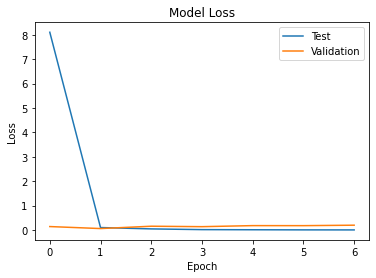

In [ ]:
plt.plot(validate.history['loss'])
plt.plot(validate.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Plotting Testing and Validation Accuracies

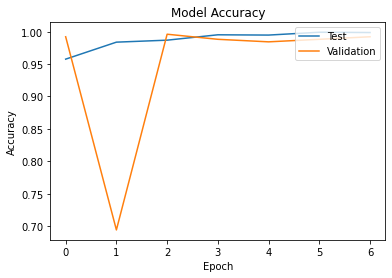

In [ ]:
plt.plot(validate.history['acc'])
plt.plot(validate.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Predicting whether an image has brain tumour or not

In [ ]:
def classify(classification):
    if classification==0:
        return 'there is a tumour!'
    else:
        return 'there is no tumour!'

0
[[9.9909496e-01 9.0511062e-04]]
99.90949630737305% Sure that there is a tumour!


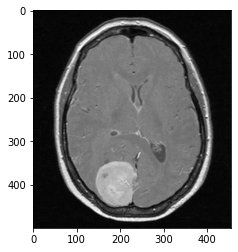

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Testing/meningioma_tumor/image(24).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(classification)
print(res)
print(str(res[0][classification]*100) + '% Sure that ' + classify(classification))

1
[[2.8788808e-04 9.9971205e-01]]
99.97120499610901% Sure that there is no tumour!


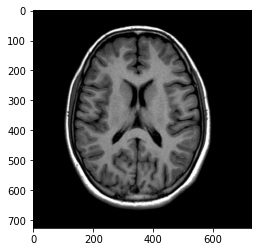

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Training/no_tumor/image(288).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(classification)
print(res)
print(str(res[0][classification]*100) + '% Sure that ' + classify(classification))

In [ ]:
from sklearn.metrics import confusion_matrix

k = model.predict(x_test)
for i in range(len(k)):
  if (k[i][0]>k[i][1]):
    k[i] = int(1)
    print(k[i])
  else:
    k[i] = 0
  k[i] = max(k[i])
  y_test[i] = y_test[i][1]
k_flatten = k.flatten()
print(k_flatten, "\n")
y_test_flatten = y_test.flatten()
print(y_test_flatten)

# simply call the confusion_matrix function to build a confusion matrix
print("\n\n Confusion matrix:")
# cm = confusion_matrix(k_flatten, y_test_flatten)
cm = confusion_matrix(y_test_flatten, k_flatten)
print(cm)

[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


# 2nd CNN

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(16, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(32, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='RMSProp', metrics=['acc'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 16)      208       
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 16)      1040      
                                                                 
 batch_normalization_9 (Batc  (None, 128, 128, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 32)       

# Validation

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
validate = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test), callbacks=[early_stop])

Epoch 1/30
58/58 [==============================] - 3s 35ms/step - loss: 1.6133 - acc: 0.9484 - val_loss: 0.0509 - val_acc: 0.9647
Epoch 2/30
58/58 [==============================] - 2s 30ms/step - loss: 0.2721 - acc: 0.9747 - val_loss: 0.0561 - val_acc: 0.9490
Epoch 3/30
58/58 [==============================] - 2s 31ms/step - loss: 0.2313 - acc: 0.9755 - val_loss: 0.0850 - val_acc: 0.9765
Epoch 4/30
58/58 [==============================] - 2s 30ms/step - loss: 0.1617 - acc: 0.9821 - val_loss: 0.1186 - val_acc: 0.8392
Epoch 5/30
58/58 [==============================] - 2s 31ms/step - loss: 0.1975 - acc: 0.9821 - val_loss: 0.0714 - val_acc: 0.9843
Epoch 6/30
58/58 [==============================] - 2s 30ms/step - loss: 0.1316 - acc: 0.9856 - val_loss: 0.1003 - val_acc: 0.9882
Epoch 6: early stopping


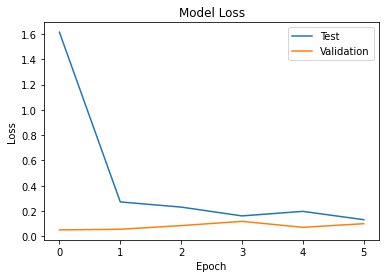

In [ ]:
plt.plot(validate.history['loss'])
plt.plot(validate.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

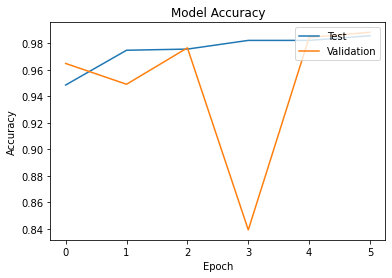

In [ ]:
plt.plot(validate.history['acc'])
plt.plot(validate.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Predicting whether an image has brain tumour or not

In [ ]:
def classify(classification):
    if classification==0:
        return 'there is a tumour!'
    else:
        return 'there is no tumour!'

0
[[1.00000e+00 8.45415e-14]]
100.0% Sure that there is a tumour!


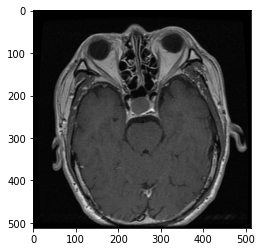

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Training/Type_4/p (820).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(classification)
print(res)
print(str(res[0][classification]*100) + '% Sure that ' + classify(classification))

0
[[1.000000e+00 2.129749e-08]]
100.0% Sure that there is a tumour!


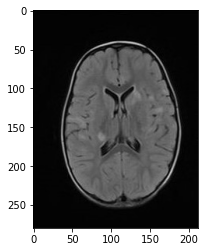

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Testing/no_tumor/image(88).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(classification)
print(res)
print(str(res[0][classification]*100) + '% Sure that ' + classify(classification))

In [ ]:
from sklearn.metrics import confusion_matrix

k = model.predict(x_test)
for i in range(len(k)):
  if (k[i][0]>k[i][1]):
    k[i] = int(1)
    print(k[i])
  else:
    k[i] = 0
  k[i] = max(k[i])
  y_test[i] = y_test[i][1]
k_flatten = k.flatten()
print(k_flatten, "\n")
y_test_flatten = y_test.flatten()
print(y_test_flatten)

# simply call the confusion_matrix function to build a confusion matrix
print("\n\n Confusion matrix:")
# cm = confusion_matrix(k_flatten, y_test_flatten)
cm = confusion_matrix(y_test_flatten, k_flatten)
print(cm)

[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
